# <font color="green"> Homework 2</font>

------
### Information
**Name:** Ahmed Ibrahim

**Student Number:** 261032796

**Date:** 2022-02-02

**Course Number:** YCBS 258 - Practical Machine Learning

------

1. Choose 4 hyperparameters we have learned about in class
2. Create lists of the different options of hyperparameters
3. Randomly sample from those lists and train a Keras model on Fashion - MNIST
4. Display the different loss and accuracy curves using matplotlib
** train at least 10 different models

In [ ]:
lr = (0.1, 0.01)
bs = (1,127)
opt = ['adam'...]


## Data Mining 

In [5]:
# Colors.
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [6]:
import random
random.seed(12)
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
%tensorflow_version 2.x
import tensorflow as tf

In [8]:
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras import activations
from tensorflow.keras import initializers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

In [9]:
# Load data.
from keras.datasets import fashion_mnist
fashion_data = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Data Exploration

In [11]:
# Seperate data according to train/test and labels/predictors.
(X_train, y_train), (X_test, y_test) = fashion_data

In [12]:
# Summarize data shape.
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


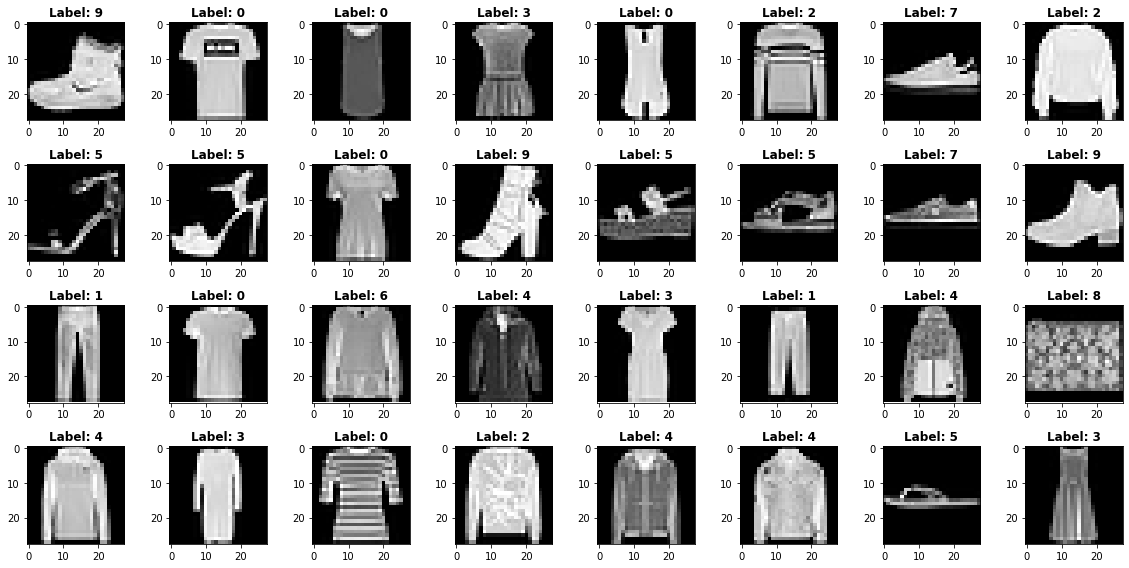

In [13]:
# Visualize sample of images.
number_row = 4
number_col = 8
product = number_row*number_col
images = X_train[:product]
labels = y_train[:product]
fig, axes = plt.subplots(number_row, number_col, figsize=(2*number_col, 2*number_row))

for i in range(number_row*number_col):
    ax = axes[i//number_col, i%number_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]), fontweight='bold')
    
plt.tight_layout()
plt.show();

## Data Cleaning

In [14]:
# Reshape data.
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [15]:
# One-hot Encode the labels.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
# Normalize pixels.
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

## Predictive Modeling

In [17]:
# Function to select hyperparameters (optimzer, activation, number of neurons and batch size) through randomness.
def random_hyper_selector():
    list_optimizers = ['SGD', 'RMSprop', 'Adam', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
    list_activators = ['relu', 'sigmoid', 'tanh', 'selu', 'elu', 'exponential']
    number_neurons = (15, 30, 45, 60, 75, 90)
    batch_sizes = (300, 600, 1000, 1200, 2000, 3000, 4000, 5000)
    
    hyper_for_single_run = (random.choice(list_optimizers), random.choice(list_activators),
                            random.choice(number_neurons), random.choice(batch_sizes))
    
    return hyper_for_single_run

In [18]:
# Function for formating a string for the hyperparameters.
def format_hypers(hyper_tuple_example):
    hyper_string  = f'Optimizer: {hyper_tuple_example[0]}, Activation function: {hyper_tuple_example[1]}, Number of neurons: {hyper_tuple_example[2]}, Batch size: {hyper_tuple_example[3]}.'
    return hyper_string

In [19]:
# Test 'random_hyper_selector()' and 'format_hypers()'.
Number_of_sets = 12
for set in range(Number_of_sets):
    print(color.BLUE + f'Run: {set}' + color.END)
    print(color.GREEN + format_hypers(random_hyper_selector()) + color.END)

Run: 0
Optimizer: Nadam, Activation function: relu, Number of neurons: 45, Batch size: 5000.
Run: 1
Optimizer: Adagrad, Activation function: exponential, Number of neurons: 60, Batch size: 1200.
Run: 2
Optimizer: SGD, Activation function: exponential, Number of neurons: 75, Batch size: 1000.
Run: 3
Optimizer: Ftrl, Activation function: tanh, Number of neurons: 30, Batch size: 3000.
Run: 4
Optimizer: Adadelta, Activation function: relu, Number of neurons: 75, Batch size: 1200.
Run: 5
Optimizer: RMSprop, Activation function: elu, Number of neurons: 90, Batch size: 3000.
Run: 6
Optimizer: Nadam, Activation function: relu, Number of neurons: 15, Batch size: 300.
Run: 7
Optimizer: Adadelta, Activation function: relu, Number of neurons: 60, Batch size: 5000.
Run: 8
Optimizer: RMSprop, Activation function: exponential, Number of neurons: 60, Batch size: 1000.
Run: 9
Optimizer: Adamax, Activation function: elu, Number of neurons: 75, Batch size: 1000.
Run: 10
Optimizer: SGD, Activation functio

In [20]:
# Function to template the intended deep learning topology.
def model_template(opt, act, neu, btch):
    model = Sequential()

    model.add(Flatten(input_shape = [28, 28]))
    model.add(Dense(neu, activation = act, kernel_initializer='he_normal'))
    model.add(Dense(neu, activation = act))
    model.add(Dense(10, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy',
                  optimizer = opt,
                  metrics = ['categorical_accuracy'])

    h = model.fit(X_train, y_train, epochs = 20,
              batch_size = btch, validation_split = 0.30)
    return h

In [21]:
# Test a single run of 'model_template' by using hyperparameters from 'random_hyper_selector()'.
hypers = random_hyper_selector()
print(color.DARKCYAN + color.BOLD + format_hypers(hypers) + color.GREEN)
model_template(hypers[0], hypers[1], hypers[2], hypers[3])

Optimizer: Ftrl, Activation function: elu, Number of neurons: 60, Batch size: 300.
Epoch 1/20
140/140 [==============================] - 2s 7ms/step - loss: 2.3034 - categorical_accuracy: 0.0982 - val_loss: 2.3026 - val_categorical_accuracy: 0.0971
Epoch 2/20
140/140 [==============================] - 1s 6ms/step - loss: 2.3026 - categorical_accuracy: 0.0991 - val_loss: 2.3026 - val_categorical_accuracy: 0.0971
Epoch 3/20
140/140 [==============================] - 1s 6ms/step - loss: 2.3026 - categorical_accuracy: 0.0996 - val_loss: 2.3026 - val_categorical_accuracy: 0.0971
Epoch 4/20
140/140 [==============================] - 1s 6ms/step - loss: 2.3026 - categorical_accuracy: 0.0989 - val_loss: 2.3026 - val_categorical_accuracy: 0.0971
Epoch 5/20
140/140 [==============================] - 1s 6ms/step - loss: 2.3026 - categorical_accuracy: 0.1013 - val_loss: 2.3026 - val_categorical_accuracy: 0.0971
Epoch 6/20
140/140 [==============================] - 1s 6ms/step - loss: 2.3026 - cate

In [25]:
# Function to generate models with random set of hyperparameters for the herein task.
def model_generator(Number_of_runs):
    hypers_run_list = []
    runs = range(Number_of_runs)
    history_list = []
    for run in runs:
        K.clear_session()
        hypers_run = random_hyper_selector()
        hypers_run_list.append(hypers_run)
        print(color.RED + color.BOLD + f'Run: {run}' + color.END)
        print(color.DARKCYAN + color.BOLD + format_hypers(hypers_run) + color.GREEN)
        h_run = model_template(hypers_run[0], hypers_run[1], hypers_run[2], hypers_run[3])
        history_list.append(h_run)
    summary_list = [runs, hypers_run_list, history_list]
    return summary_list

In [26]:
# Run experiment. 
run_experiment = model_generator(12)

Run: 0
Optimizer: Adadelta, Activation function: sigmoid, Number of neurons: 60, Batch size: 3000.
Epoch 1/20
14/14 [==============================] - 1s 40ms/step - loss: 2.4702 - categorical_accuracy: 0.1013 - val_loss: 2.4722 - val_categorical_accuracy: 0.0971
Epoch 2/20
14/14 [==============================] - 0s 31ms/step - loss: 2.4694 - categorical_accuracy: 0.1013 - val_loss: 2.4714 - val_categorical_accuracy: 0.0971
Epoch 3/20
14/14 [==============================] - 0s 30ms/step - loss: 2.4686 - categorical_accuracy: 0.1013 - val_loss: 2.4705 - val_categorical_accuracy: 0.0971
Epoch 4/20
14/14 [==============================] - 0s 30ms/step - loss: 2.4677 - categorical_accuracy: 0.1013 - val_loss: 2.4697 - val_categorical_accuracy: 0.0971
Epoch 5/20
14/14 [==============================] - 0s 31ms/step - loss: 2.4669 - categorical_accuracy: 0.1013 - val_loss: 2.4689 - val_categorical_accuracy: 0.0971
Epoch 6/20
14/14 [==============================] - 0s 29ms/step - loss: 2.4

## Data Visualization

### Data Vizualization for comparing all metrics grouped by runs

In [29]:
# Function to plot results grouped by run.
def plot_experiment_by_run(experiment_data):
    runs = experiment_data[0]
    length_runs = len(runs)
    metrics = ['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy']
    plt.style.use('fivethirtyeight')
    figsize_height = length_runs*5
    fig, axs = plt.subplots(length_runs, figsize = (10, figsize_height))
    fig.suptitle('Deep Learning Results Grouped by Run', y = 1.01, fontsize = 25, ha = "center")
    for run in runs:
        for metric in metrics:
            axs[run].plot(experiment_data[2][run].epoch, 
                          experiment_data[2][run].history[metric], 
                          label = metric)
            axs[run].legend(loc = 'upper right')
            axs[run].set_title(f'Run: {run}, ' + format_hypers(experiment_data[1][run]))
    for ax in axs.flat:
        ax.set(xlabel='Epoch', ylabel='Metric')
    fig.tight_layout()
    fig.show();

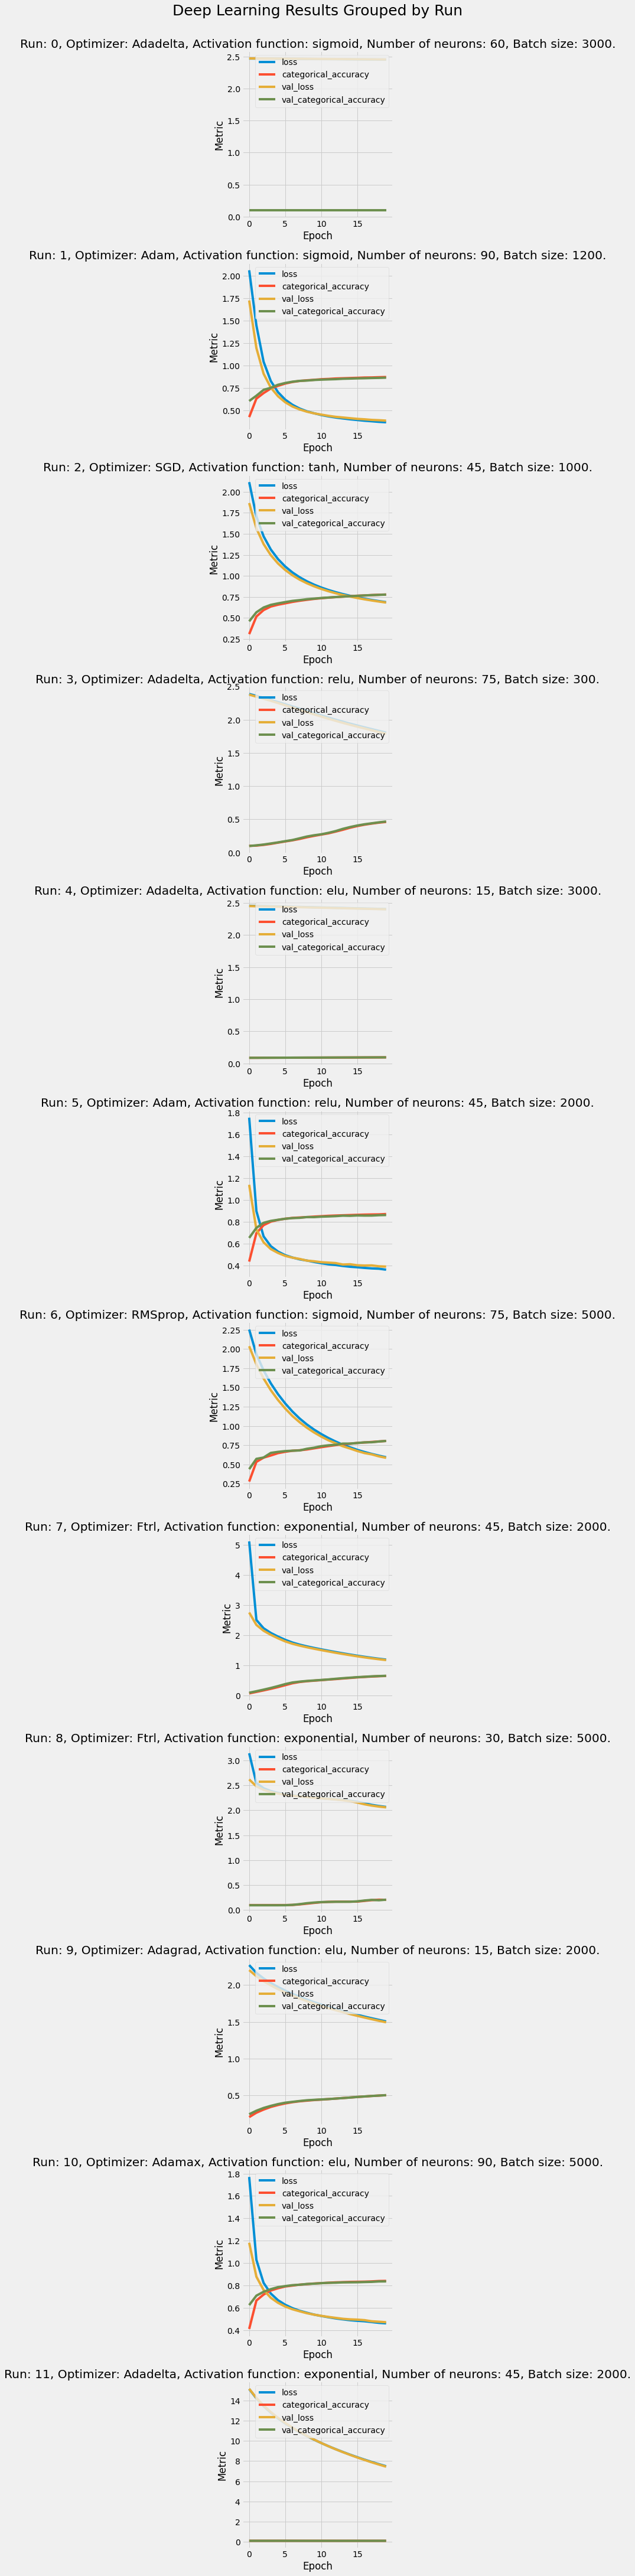

In [30]:
# Plot experiment for grouped by run.
plot_experiment_by_run(run_experiment)

### Data Vizualization for comparing all metrics grouped by metrics

In [31]:
# Function to plot results grouped by metrics.
def plot_experiment_by_metrics(experiment_data):
    runs = experiment_data[0]
    metrics = ['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy']
    length_metrics = len(metrics)
    plt.style.use('fivethirtyeight')
    figsize_height = length_metrics*7.5
    fig, axs = plt.subplots(length_metrics, figsize = (12, figsize_height))
    fig.suptitle('Deep Learning Results Grouped by Metrics', y = 1.01, fontsize = 25, ha = "center")
    for run in runs:
        for metric in metrics:
            axs[metrics.index(metric)].plot(experiment_data[2][run].epoch, 
                          experiment_data[2][run].history[metric], 
                          label = experiment_data[1][run])
            axs[metrics.index(metric)].legend(loc = 'upper right')
            axs[metrics.index(metric)].set_title(f'Metric: {metric}')
    for ax in axs.flat:
        ax.set(xlabel='Epoch', ylabel='Metric')
    fig.tight_layout()
    fig.show();

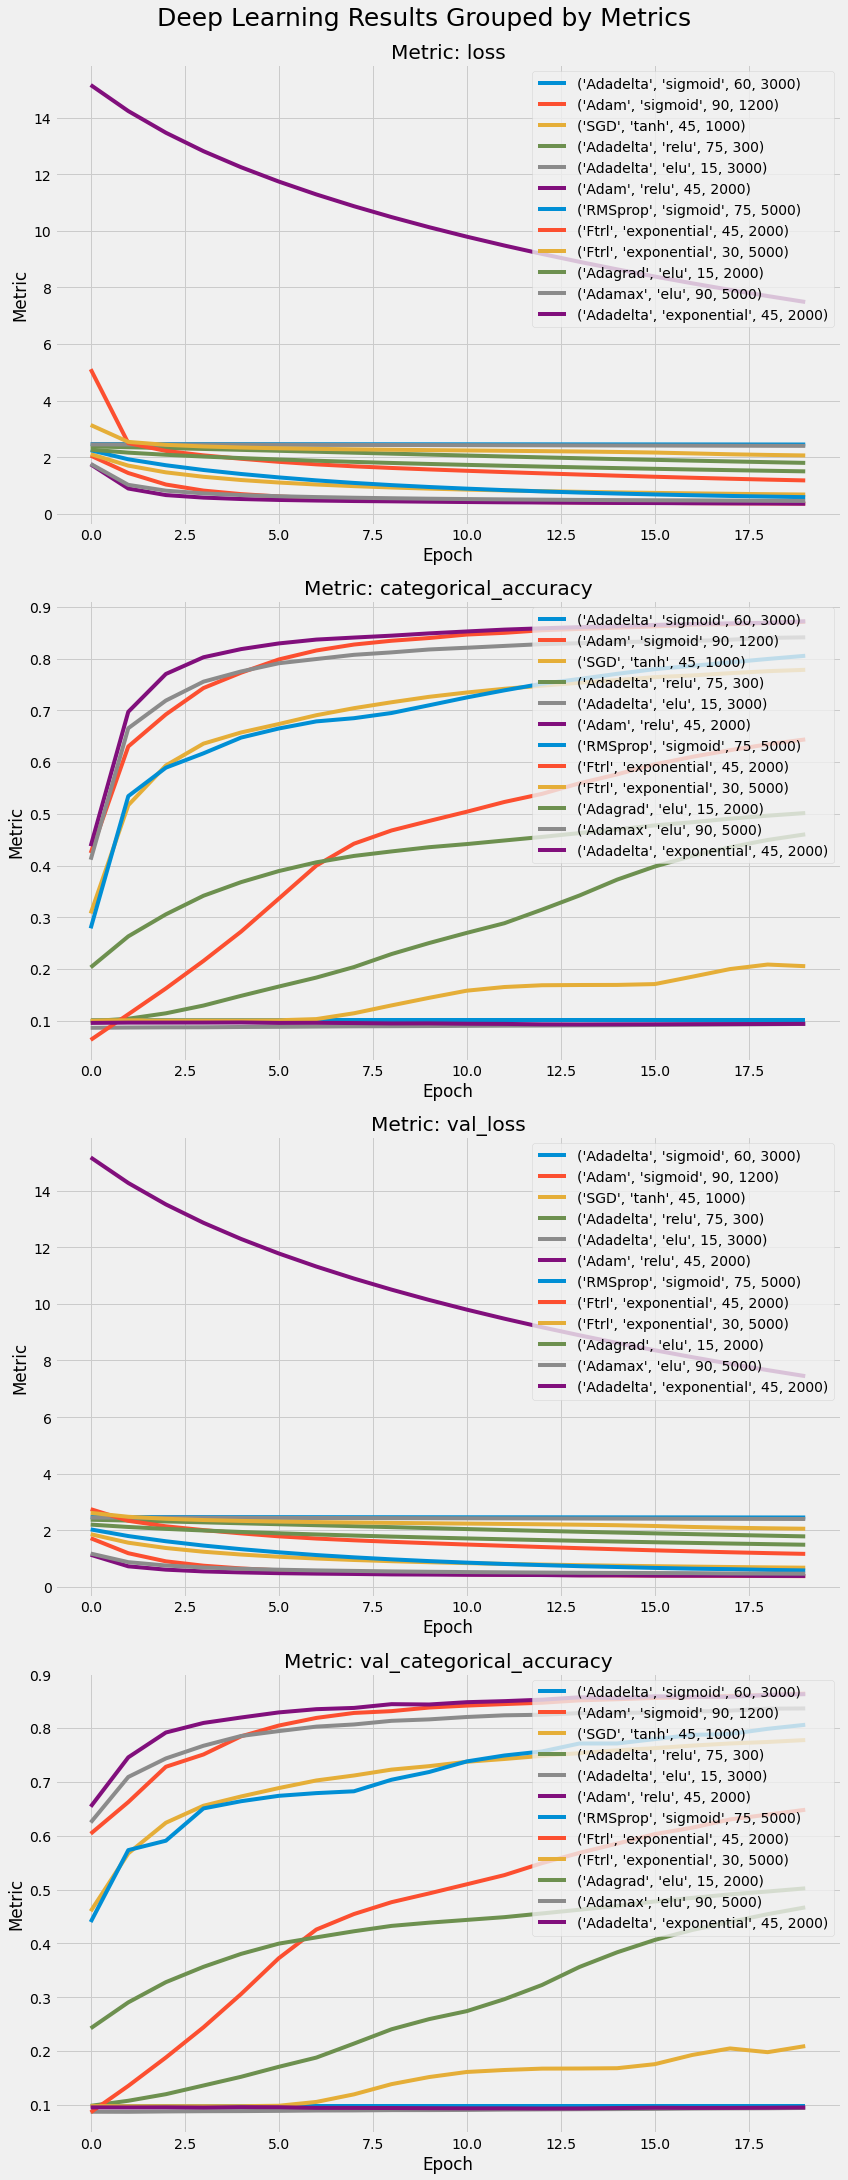

In [32]:
# Plot experiment for grouped by metrics.
plot_experiment_by_metrics(run_experiment)

## Model Improvement 

Based on the resulting visualizations from the initial batch of hyperparameters tested, the list of hyperparameters to test has been reduced and its results have been visualized below.

In [33]:
# Narrowed list of hyperparameters. 
def random_hyper_selector_improved():
    list_optimizers = ['RMSprop', 'Adam', 'Adamax', 'Nadam']
    list_activators = ['relu', 'sigmoid', 'tanh', 'selu', 'elu']
    number_neurons = (30, 45, 60, 75)
    batch_sizes = (1000, 1200, 1500, 2400, 3000)
    
    hyper_for_single_run = (random.choice(list_optimizers), random.choice(list_activators),
                            random.choice(number_neurons), random.choice(batch_sizes))
    
    return hyper_for_single_run

In [34]:
# Model generator for narrowed list of hyperparameters
def model_generator_improved(Number_of_runs):
    hypers_run_list = []
    runs = range(Number_of_runs)
    history_list = []
    for run in runs:
        K.clear_session()
        hypers_run = random_hyper_selector_improved()
        hypers_run_list.append(hypers_run)
        print(color.RED + color.BOLD + f'Run: {run}' + color.END)
        print(color.DARKCYAN + color.BOLD + format_hypers(hypers_run) + color.GREEN)
        h_run = model_template(hypers_run[0], hypers_run[1], hypers_run[2], hypers_run[3])
        history_list.append(h_run)
    summary_list = [runs, hypers_run_list, history_list]
    return summary_list

In [35]:
# Run experiment again to short-list of hyperparameters.
run_experiment_improved = model_generator_improved(12)

Run: 0
Optimizer: RMSprop, Activation function: relu, Number of neurons: 30, Batch size: 1200.
Epoch 1/20
35/35 [==============================] - 1s 15ms/step - loss: 1.3403 - categorical_accuracy: 0.5747 - val_loss: 0.9173 - val_categorical_accuracy: 0.6756
Epoch 2/20
35/35 [==============================] - 0s 11ms/step - loss: 0.7777 - categorical_accuracy: 0.7462 - val_loss: 0.6909 - val_categorical_accuracy: 0.7588
Epoch 3/20
35/35 [==============================] - 0s 11ms/step - loss: 0.6419 - categorical_accuracy: 0.7834 - val_loss: 0.6082 - val_categorical_accuracy: 0.7852
Epoch 4/20
35/35 [==============================] - 0s 11ms/step - loss: 0.5851 - categorical_accuracy: 0.7979 - val_loss: 0.5573 - val_categorical_accuracy: 0.8056
Epoch 5/20
35/35 [==============================] - 0s 11ms/step - loss: 0.5428 - categorical_accuracy: 0.8114 - val_loss: 0.5600 - val_categorical_accuracy: 0.7963
Epoch 6/20
35/35 [==============================] - 0s 11ms/step - loss: 0.5194 

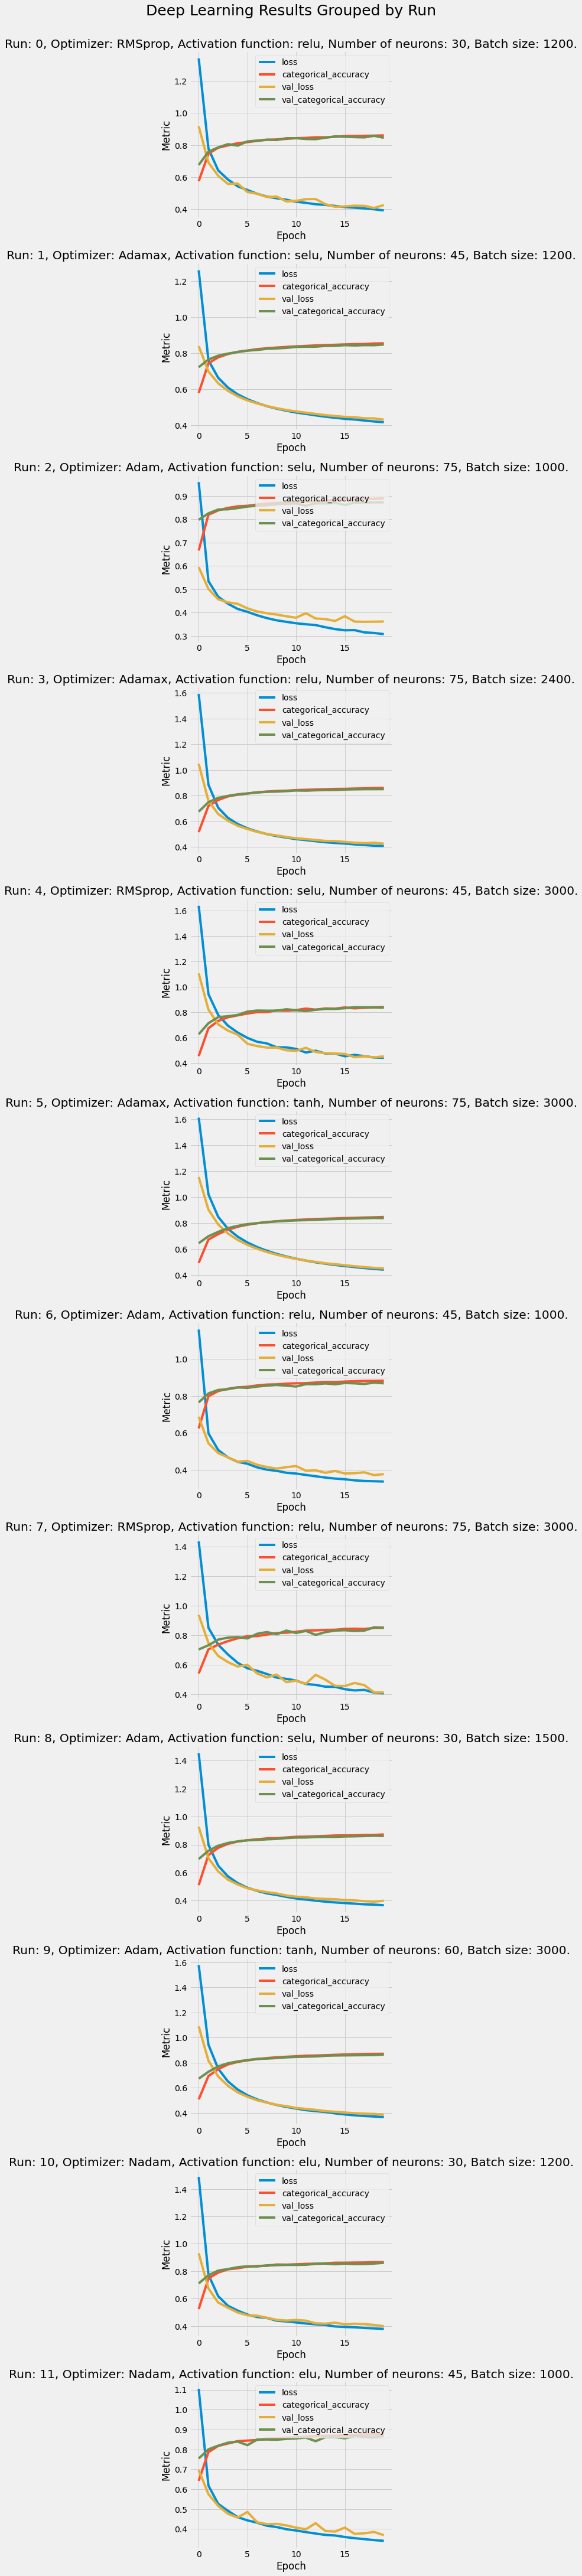

In [36]:
# Plot experiment for grouped by run with improved list of hyperparameter.
plot_experiment_by_run(run_experiment_improved)

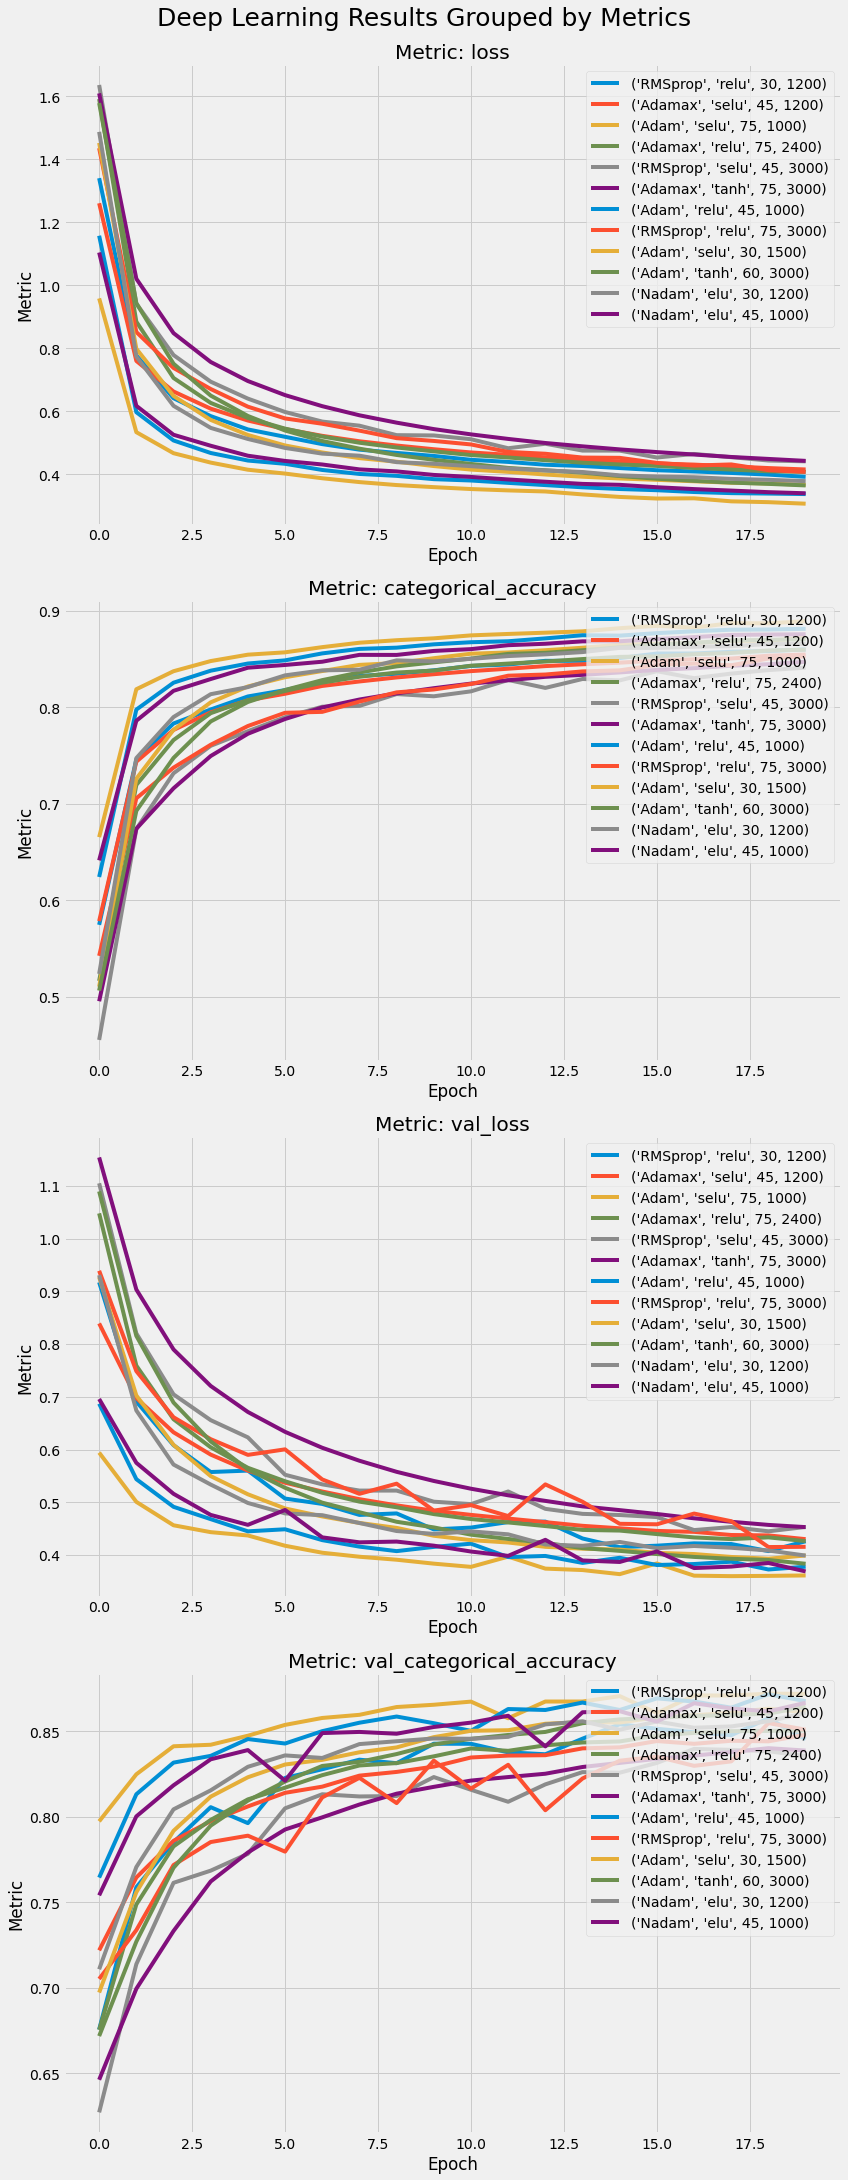

In [37]:
# Plot experiment for grouped by metrics with improved list of hyperparameter.
plot_experiment_by_metrics(run_experiment_improved)

## Conclusion

Four hyperparameters were varied over two testing cycles, being the choices of optimizers, activation functions, number of neurons, and batch size. The rest of the hyperparameters and features remained the same for each run. The first set of runs from the initial lists of hyperparameters yielded some dead, poor and great models. Based on the great models, a new list of these four hyperparameters was made and used for the second test cycle. All twelve runs with either combination of hyperparameters from the new lists yielded models with accuracies above 85.00 %. It is worth noting that further investigation would be needed to test other hyperparameters, dive deeper into the learning curves/performances of these models, and potentially use hyperparameter search scripts to dig for better solutions. 